In [1]:
import numpy as np, healpy as hp, analysis as ana, plottools as pl, binning as bins, prjlib
from matplotlib.pyplot import *

In [2]:
ps, fs = prjlib.filename_init(doreal='True',stype='lcmb')
pd, fd = prjlib.filename_init(doreal='False',stype='dust')

In [4]:
cn = 3
mb = bins.multipole_binning(50,lmin=100,lmax=2048)
sBB = prjlib.binned_cl_rlz(fs.cli,0,100,mb,cn=cn)
mBB = np.mean(sBB,axis=0)
vBB = np.std(sBB,axis=0)
oBB = prjlib.binned_cl(fs.ocl,mb,cn=cn)
dBB = prjlib.binned_cl(fd.cli[0],mb,cn=cn)

24.4 0.0 83.5 0.75


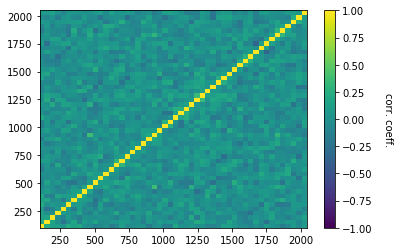

In [5]:
st = ana.PTEs(dBB,sBB,disp=' ')
pl.plot_corr(sBB,100,2048)

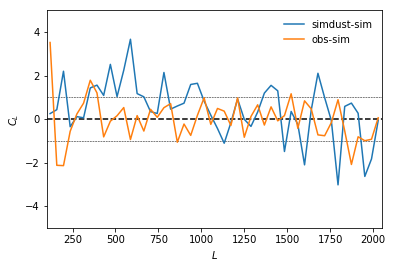

In [6]:
pl.plot_1dstyle(spc='',frac=True,ylab=r'$C_L$',xmin=100,xmax=2048)
#plot(mb.bc,(oBB-mBB)/vBB,label='obs')
plot(mb.bc,(dBB-mBB)/vBB,label='simdust-sim')
plot(mb.bc,(oBB-mBB)/vBB,label='obs-sim')
legend(loc=0,frameon=False)

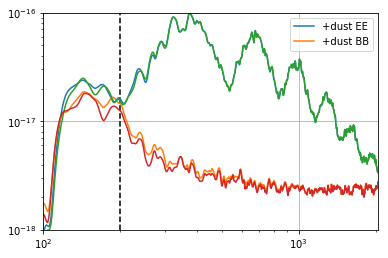

In [7]:
ps, fs = prjlib.filename_init(doreal='False',stype='lcmb')
L, EE, BB = np.loadtxt(fs.cli[0],unpack=True,usecols=(0,2,3))
L, ee, bb = np.loadtxt(fd.cli[0],unpack=True,usecols=(0,2,3))
xlim(100,2048)
ylim(1e-18,1e-16)
#ylim(.9,1.5)
grid(True)
xscale('log')
yscale('log')
axvline(200,ls='--',color='k')
plot(L,ee,label='+dust EE')
plot(L,bb,label='+dust BB')
plot(L,EE)
plot(L,BB)
legend(loc=0)
savefig('test.png')